1. Acquiring, preprocessing, and analyzing the data

Importing libraries that are necessary for the project:

In [16]:
import pandas as pd #data Analysis
import numpy as np  #scientific compution
import seaborn as sns #statistical plotting

IMPORT TRAIN DATA and TAKE A LOOK


In [2]:
adult_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data" , names=['age','workclass','fnlwgt', 'education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','class'])
adult_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


replace '?' values to nan and drop the instances with missing values

In [3]:
non=[" ?", "?"]
adult_data=adult_data.replace(non, np.nan)  #replace '?' values to nan
adult_data.dropna(inplace=True) #remove instances with missing or malformed features

Analyzing Data by creating some plots

First for categorized Data

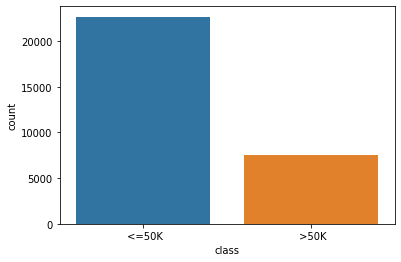

In [4]:
sns.countplot(x="class" , data = adult_data)

In comparison with Class

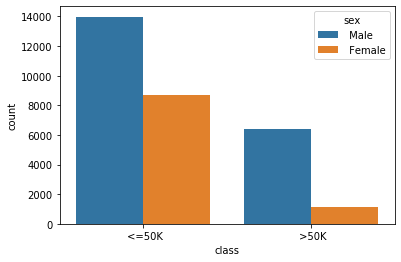

In [6]:
sns.countplot(x="class" , hue="sex",  data = adult_data)

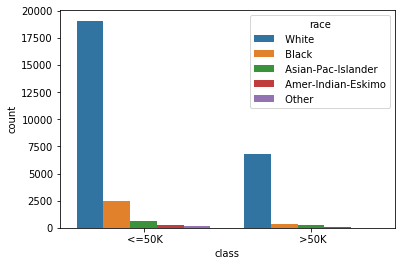

In [7]:
sns.countplot(x="class" , hue="race", data=adult_data)

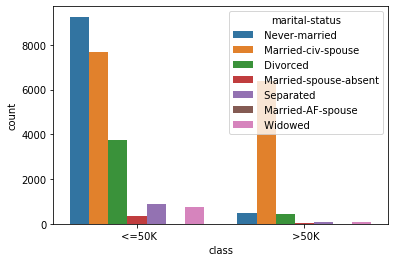

In [8]:
sns.countplot(x="class" , hue="marital-status", data=adult_data)

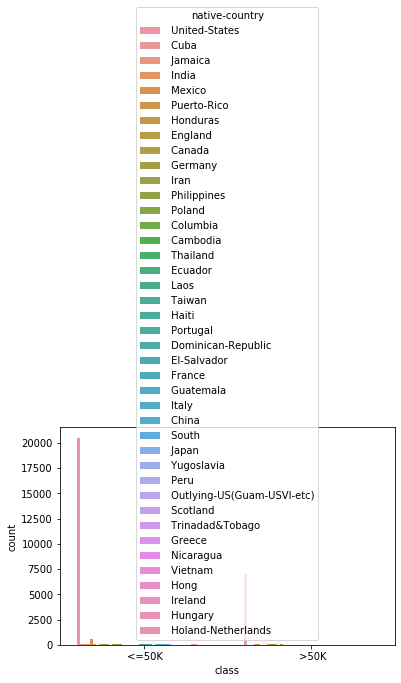

In [9]:
sns.countplot(x="class" , hue="native-country", data=adult_data)


Alone

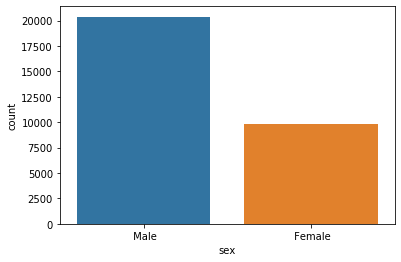

In [10]:
sns.countplot(x="sex",  data = adult_data)

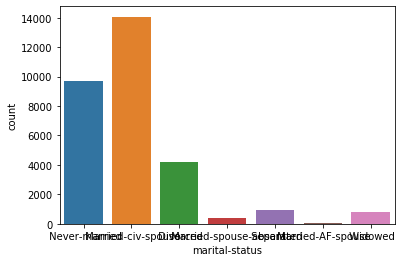

In [11]:
sns.countplot(x="marital-status", data=adult_data)


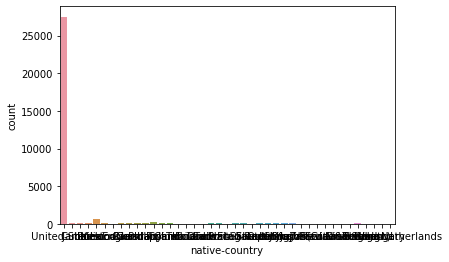

In [13]:
sns.countplot(x="native-country", data=adult_data)      


We see ~99% are from US so we can drop this feature

In [15]:
adult_data=adult_data.drop("native-country" , axis=1) 


KeyError: "['native-country'] not found in axis"

For Continues Features

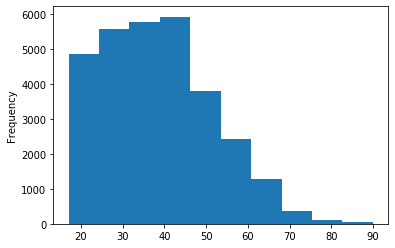

In [17]:
adult_data["age"].plot.hist()


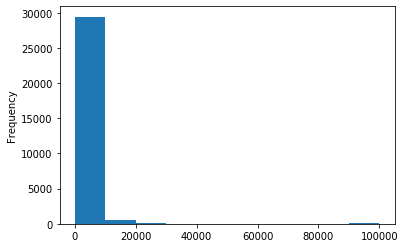

In [18]:
adult_data["capital-gain"].plot.hist()


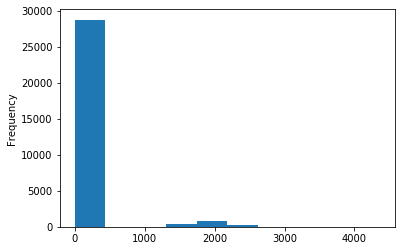

In [19]:
adult_data["capital-loss"].plot.hist()


'capital-gain' and 'capital-loss' seems to show just one number most of the times

In [22]:
adult_data.isin([0]).sum()[10:12] 
(adult_data.sum()[10:12]-adult_data.isin([0]).sum()[10:12])/(adult_data.sum()[10:12]) 

capital-gain    0.999161
capital-loss     0.98922
dtype: object

As we see, near %90 they show '0'. So we can drop them.

In [23]:
adult_data=adult_data.drop("capital-gain", axis=1)
adult_data=adult_data.drop("capital-loss"  , axis=1)

We use One-hot encoding for categorical features

In [24]:
sex=pd.get_dummies(adult_data['sex'], drop_first=True)
races=pd.get_dummies(adult_data['race'], drop_first=True)
relation=pd.get_dummies(adult_data['relationship'], drop_first=True)
workclass=pd.get_dummies(adult_data['workclass'], drop_first=True)
education=pd.get_dummies(adult_data['education'], drop_first=True)
occupation=pd.get_dummies(adult_data['occupation'], drop_first=True)
marital=pd.get_dummies(adult_data['marital-status'], drop_first=True)
income=pd.get_dummies(adult_data['class'], drop_first=True)

adult_data=pd.concat([adult_data,sex,races,relation,workclass,education,occupation,marital,income], axis=1 )
adult_data=adult_data.drop(['sex','race','relationship','workclass','education','occupation','marital-status','class'], axis=1)


Now we can take a look at them:

In [26]:
adult_data.head()

,age,fnlwgt,education-num,hours-per-week,Male,Asian-Pac-Islander,Black,Other,White,Not-in-family,...,Sales,Tech-support,Transport-moving,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed,>50K
0,39,77516,13,40,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,0,0
1,50,83311,13,13,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,38,215646,9,40,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,53,234721,7,40,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,28,338409,13,40,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


We use Feature_scaling and then take a look at data:

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
adult_data[['age', 'fnlwgt','education-num','hours-per-week']] = scaler.fit_transform(adult_data[['age', 'fnlwgt','education-num','hours-per-week']])
adult_data.head()

,age,fnlwgt,education-num,hours-per-week,Male,Asian-Pac-Islander,Black,Other,White,Not-in-family,...,Sales,Tech-support,Transport-moving,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed,>50K
0,0.301370,0.043338,0.800000,0.397959,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,0,0
1,0.452055,0.047277,0.800000,0.122449,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,0.287671,0.137244,0.533333,0.397959,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0.493151,0.150212,0.400000,0.397959,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0.150685,0.220703,0.800000,0.397959,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


IMPORT TEST DATA and TAKE A LOOK

In [56]:
adult_test = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test" , names=['age','workclass','fnlwgt', 'education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','class'])
adult_test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,|1x3 Cross validator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.


replace '?' values to nan and drop the instances with missing values

In [57]:
non=[" ?", "?"]
adult_test=adult_test.replace(non, np.nan)  #replace '?' values to nan
adult_test.dropna(inplace=True) #remove instances with missing or malformed features

In [58]:
adult_test.head()
adult_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15060 entries, 1 to 16281
Data columns (total 15 columns):
age               15060 non-null object
workclass         15060 non-null object
fnlwgt            15060 non-null float64
education         15060 non-null object
education-num     15060 non-null float64
marital-status    15060 non-null object
occupation        15060 non-null object
relationship      15060 non-null object
race              15060 non-null object
sex               15060 non-null object
capital-gain      15060 non-null float64
capital-loss      15060 non-null float64
hours-per-week    15060 non-null float64
native-country    15060 non-null object
class             15060 non-null object
dtypes: float64(5), object(10)
memory usage: 1.8+ MB


As we see, 'age' type is object. so we change it to numerical type.

In [59]:
adult_test['age'] = adult_test['age'].apply(pd.to_numeric) 

Analyzing Data by creating some plots

For categorized Data

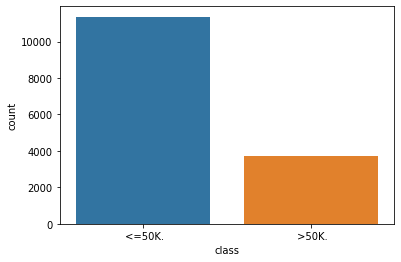

In [40]:
sns.countplot(x="class" , data = adult_test)


In comparison with Class

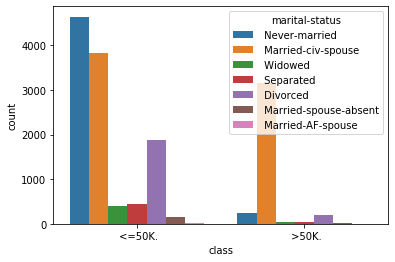

In [41]:
sns.countplot(x="class" , hue="marital-status", data=adult_test)


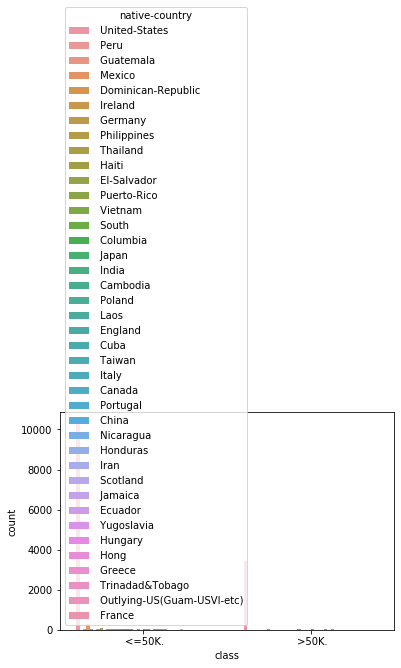

In [42]:
sns.countplot(x="class" , hue="native-country", data=adult_test)


Alone

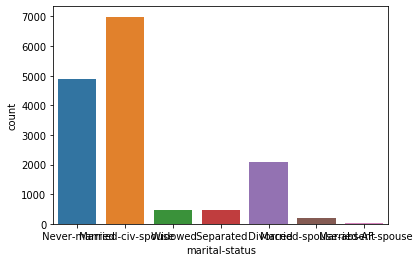

In [43]:
sns.countplot(x="marital-status", data=adult_test)


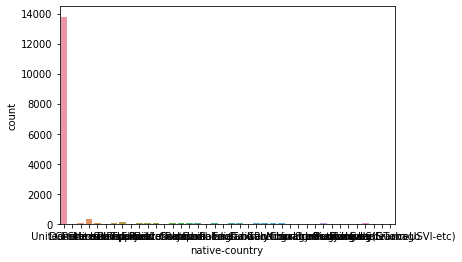

In [45]:
sns.countplot(x="native-country", data=adult_test)      

We see ~99% are from US so we can drop this feature

In [60]:
adult_test=adult_test.drop("native-country" , axis=1)


In [61]:
adult_test.isin([0]).sum()[10:12] 
(adult_test.sum()[10:12]-adult_test.isin([0]).sum()[10:12])/(adult_test.sum()[10:12])

capital-gain    0.999182
capital-loss    0.989301
dtype: object

As we see, near %90 they show '0'. So we can drop them.

In [62]:
adult_test=adult_test.drop("capital-gain", axis=1)
adult_test=adult_test.drop("capital-loss"  , axis=1)

One-hot encoding for categorical features

In [63]:
sex=pd.get_dummies(adult_test['sex'], drop_first=True)
races=pd.get_dummies(adult_test['race'], drop_first=True)
relation=pd.get_dummies(adult_test['relationship'], drop_first=True)
workclass=pd.get_dummies(adult_test['workclass'], drop_first=True)
education=pd.get_dummies(adult_test['education'], drop_first=True)
occupation=pd.get_dummies(adult_test['occupation'], drop_first=True)
marital=pd.get_dummies(adult_test['marital-status'], drop_first=True)
income=pd.get_dummies(adult_test['class'], drop_first=True)

adult_test=pd.concat([adult_test,sex,races,relation,workclass,education,occupation,marital,income], axis=1 )
adult_test=adult_test.drop(['sex','race','relationship','workclass','education','occupation','marital-status','class'], axis=1)


Now we can take a look at them:

In [64]:
adult_test.head()

,age,fnlwgt,education-num,hours-per-week,Male,Asian-Pac-Islander,Black,Other,White,Not-in-family,...,Sales,Tech-support,Transport-moving,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed,>50K.
1,25,226802.0,7.0,40.0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,38,89814.0,9.0,50.0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,28,336951.0,12.0,40.0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
4,44,160323.0,10.0,40.0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
6,34,198693.0,6.0,30.0,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,0,0


We use feature_scaling

In [65]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
adult_test[['age', 'fnlwgt','education-num','hours-per-week']] = scaler.fit_transform(adult_test[['age', 'fnlwgt','education-num','hours-per-week']])

In [52]:
adult_test.head()

,age,fnlwgt,education-num,hours-per-week,Male,Asian-Pac-Islander,Black,Other,White,Not-in-family,...,Sales,Tech-support,Transport-moving,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed,>50K.
1,0.109589,0.144430,0.400000,0.397959,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0.287671,0.051677,0.533333,0.500000,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0.150685,0.219011,0.733333,0.397959,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
4,0.369863,0.099418,0.600000,0.397959,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
6,0.232877,0.125398,0.333333,0.295918,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,0,0


X, y for train data

In [66]:
X_train=adult_data.drop(' >50K', axis=1)
y_train=adult_data[' >50K']

X, y for test data

In [68]:
X_test=adult_test.drop(' >50K.', axis=1)
y_test=adult_test[' >50K.']


2. Implementing the models

2.1. Implementing logistic regression

A class for logistic regression with gradient descent:

In [69]:
class Logistic_Regression:
    def __init__(self,
                 lr = 0.01, #learning rate of the gradient descent method
                 eps = 1e-2 # termination condition of the gradient descent method
                ):
        self.lr = lr
        self.eps = eps
        
    # Implementing the logistic function
    def __logistic_function(self, x):
        return 1/(1 + np.exp(-x))
    
    # Implementing the cost function
    def __cost(self,
               w, # N
               X_train, # N x D
               y_train, # N
              ):
        z = np.dot(X_train, w) # N x 1
        J = np.mean(y_train * np.log1p(np.exp(-z)) + (1 - y_train) * np.log1p(np.exp(z)))
        return J
    
    # Implementing the gradient function
    def __gradient(self,
                   w, # N
                   X_train, # N x D
                   y_train, # N
                  ):
        N = y_train.size
        z = np.dot(X_train, w) # N x 1
        yh = self.__logistic_function(z)
        return np.dot(X_train.T, (yh - y_train)) / N
    
    def __GradientDescent(self,
                          X_train, # N x D
                          y_train, # N
                          lr, #learning rate
                          #n_iterations = 300
                          eps# termination condition
                         ):
        #N, D = X.shape
        N = X_train.shape[0]
        
        intercept = np.ones((N, 1))
        X_train = np.concatenate((intercept, X_train), axis=1)
        
        D = X_train.shape[1]
        
        w = np.zeros(D)
        g = np.inf
        
        n_iterations = 0 # just for counting the number of iterations
        
        while (np.linalg.norm(g) > eps):
            g = self.__gradient(w, X_train, y_train)
            w = w - lr * g
            
            n_iterations += 1
        
        print('Number of iterations:', n_iterations)
        
        return w
    
    # Implementing the fit function
    def fit(self,
            X_train, # N x D
            y_train # N
            ):
        
        w = self.__GradientDescent(X_train, y_train, self.lr, self.eps)
        
        return w
    
    # Implementing the predict function
    def predict (self,
                 X_test,
                 w,
                threshold = 0.5
                ):
        intercept = np.ones((X_test.shape[0], 1))
        X_test = np.concatenate((intercept, X_test), axis=1)

        return self.__logistic_function(np.dot(X_test, w)) >= threshold
    
    # Function for checking the algorithm accuracy
    def evaluate_acc(self,
                    predicted_values,
                    true_values
                    ):
        check = []
        i = 0
        correct = 0
        incorrect = 0
        for y_i in true_values:
            if ((y_i == 1) and (predicted_values[i] == True)):
                check.append([True])
                correct += 1
            elif ((y_i == 0) and (predicted_values[i] == False)):
                check.append([True])
                correct += 1
            else:
                check.append([False])
                incorrect += 1  
            i += 1

        print('Correct classifications:', correct)
        print('Incorrect classifications:', incorrect)
        print('Accuracy:', correct/(correct + incorrect))

Essentially the same class but instead of the termiantion condition $\epsilon$ the number of iterations $n_{iterations}$ is used

In [70]:
class Logistic_Regression_Iter:
    def __init__(self,
                 lr = 0.01, #learning rate of the gradient descent method
                 n_iterations = 1e-2, # number of iterations of the gradient descent method
                ):
        self.lr = lr
        self.n_iterations = n_iterations
        
    # Implementing the logistic function
    def __logistic_function(self, x):
        return 1/(1 + np.exp(-x))
    
    # Implementing the cost function
    def __cost(self,
               w, # N
               X_train, # N x D
               y_train, # N
              ):
        z = np.dot(X_train, w) # N x 1
        J = np.mean(y_train * np.log1p(np.exp(-z)) + (1 - y_train) * np.log1p(np.exp(z)))
        return J
    
    # Implementing the gradient function
    def __gradient(self,
                   w, # N
                   X_train, # N x D
                   y_train, # N
                  ):
        N = y_train.size
        z = np.dot(X_train, w) # N x 1
        yh = self.__logistic_function(z)
        return np.dot(X_train.T, (yh - y_train)) / N
    
    def __GradientDescent(self,
                          X_train, # N x D
                          y_train, # N
                          lr, #learning rate
                          n_iterations # termination condition
                         ):
        #N, D = X.shape
        N = X_train.shape[0]
        
        intercept = np.ones((N, 1))
        X_train = np.concatenate((intercept, X_train), axis=1)
        
        D = X_train.shape[1]
        
        w = np.zeros(D)
        g = np.inf
        
        n = 0 # just for counting the number of iterations
        while (n_iterations > n):
            g = self.__gradient(w, X_train, y_train)
            w = w - lr * g

            n += 1

        #print('Number of iterations of the gradient descent:', n)
        
        return w
    
    # Implementing the fit function
    def fit(self,
            X_train, # N x D
            y_train # N
            ):
        
        w = self.__GradientDescent(X_train, y_train, self.lr, self.n_iterations)
        
        return w
    
    # Implementing the predict function
    def predict (self,
                 X_test,
                 w,
                threshold = 0.5
                ):
        intercept = np.ones((X_test.shape[0], 1))
        X_test = np.concatenate((intercept, X_test), axis=1)

        return self.__logistic_function(np.dot(X_test, w)) >= threshold
    
    # Function for checking the algorithm accuracy
    def evaluate_acc(self,
                    predicted_values,
                    true_values
                    ):
        check = []
        i = 0
        correct = 0
        incorrect = 0
        for y_i in true_values:
            if ((y_i == 1) and (predicted_values[i] == True)):
                check.append([True])
                correct += 1
            elif ((y_i == 0) and (predicted_values[i] == False)):
                check.append([True])
                correct += 1
            else:
                check.append([False])
                incorrect += 1  
            i += 1
        
        accuracy = correct/(correct + incorrect)
        print('Correct classifications:', correct)
        print('Incorrect classifications:', incorrect)
        print('Accuracy of the logistic regression:', correct/(correct + incorrect))
        
        return accuracy

Setting up the logistic regression:

In [72]:
LR = Logistic_Regression()

Running the fit function:

In [73]:
%time w = LR.fit(X_train, y_train)
w

Number of iterations: 13877
Wall time: 2min 10s


array([-1.30929134,  0.31480377, -0.1016531 ,  0.4880021 ,  0.20779347,
        0.33992144, -0.19168689, -0.46289884, -0.14146553, -0.34816608,
       -0.41683818, -0.34615513, -0.99065382, -0.74070526,  0.33625876,
       -0.33990814, -0.41176622,  0.18561617, -0.53083925, -0.32866343,
       -0.01580665, -0.43083734, -0.15246651, -0.1148719 , -0.21056615,
       -0.41597867, -0.298275  , -0.09538421, -0.10006125,  0.4041844 ,
        0.38976017, -0.56824473,  0.59487084, -0.0334795 ,  0.52335698,
       -0.30132093, -0.00508848, -0.17092803,  0.80125086, -0.47406292,
       -0.46735246, -0.43254434, -0.81205876, -0.06226637,  0.61831266,
        0.07984165,  0.21726641,  0.19975396, -0.20900377,  0.02584285,
        1.03752501, -0.10161961, -1.04464847, -0.21076571, -0.12447649])

Running the predict function:



In [75]:
pred = LR.predict(X_test, w)

Checking how much of the test dataset was predicted correctly:

In [77]:
accuracy = LR.evaluate_acc(pred, y_test)

Correct classifications: 12433
Incorrect classifications: 2627
Accuracy: 0.8255644090305445


2.2. Implementing Naïve Bayes

In [78]:
class Naive_Bayes_Mixed():
    def __init__(self,
                 categorical_features = None,
                 alpha = 0.5,
                 ):
        self.categorical_features = categorical_features
        self.alpha = alpha
    
    def fit(self, X_train, y_train): 

        self.epsilon = 1e-9 * np.var(X_train, ddof = 1, axis = 0).max()
        
        # Get whatever that is needed
        uniques = np.unique(y_train)
        num_classes = uniques.size
        (num_samples, num_features) = X_train.shape

        # Correct the inputs
        priors = np.bincount(y_train)/num_samples

        if self.categorical_features is None:
            self.categorical_features = []
        elif self.categorical_features is 'all':
            self.categorical_features = np.arange(0, num_features)

        # Get the index columns of the discrete data and continuous data
        self.categorical_features = np.array(
                self.categorical_features).astype(int)
        self.gaussian_features = np.delete(
                np.arange(num_features),
                self.categorical_features)

        # How many categories are there in each categorical_feature
        # Add 1 due to zero-indexing
        max_categories = np.max(X_train.to_numpy()[:, self.categorical_features],axis=0) + 1
        max_categories = max_categories.astype(int)

        # Prepare empty arrays
        if self.gaussian_features.size != 0:
            means = np.zeros((num_classes, len(self.gaussian_features)))
            stds = np.zeros((num_classes, len(self.gaussian_features)))
        if self.categorical_features.size != 0:
            self.categorical_posteriors = [
                    np.zeros((num_classes, num_categories))
                    for num_categories in max_categories]

        # TODO optimise below!
        for y_i in uniques:

            if self.gaussian_features.size != 0:
                x = X_train.to_numpy()[y_train == y_i, :][:, self.gaussian_features]
                means[y_i, :] = np.mean(x, axis=0)
                # note: it's really sigma squared
                stds[y_i, :] = np.var(x, axis=0)

            if self.categorical_features.size != 0:
                for i, categorical_feature in enumerate(self.categorical_features):
                    dist = np.bincount(
                            X_train.to_numpy()[y_train == y_i, :][:, categorical_feature].astype(int),
                            minlength = max_categories[i]) + self.alpha
                    self.categorical_posteriors[i][y_i, :] = dist / np.sum(dist)

        return priors, means, stds
    
    def __Gaussian_Naive_Mixed(self,
                               X_test,
                               priors,
                               means,
                               stds
                               ):

        X_test = np.array(X_test)

        if self.gaussian_features.size != 0:
            # TODO optimisation: Below is a copy. Can consider masking
            x_gaussian = X_test[:, self.gaussian_features]
            mu = means[:, np.newaxis]
            s = stds[:, np.newaxis] + self.epsilon

            # Likelihood from the test dataset
            likelihood = 1./np.sqrt(2.*np.pi*s) * \
                np.exp(-((x_gaussian-mu)**2.)/(2.*s))

            t = np.prod(likelihood, axis = 2)[:, :, np.newaxis]
            t = np.squeeze(t.T)

        if self.categorical_features.size != 0:

            # Cast tensor to int
            X = X_test[:, self.categorical_features].astype(int)

            # A list of length=num_features.
            # Each item in the list contains the distributions for the y_classes
            # Shape of each item is (num_classes,1,num_samples)
            preds = [categorical_posterior[:, X[:, i][:, np.newaxis]]
                      for i, categorical_posterior
                      in enumerate(self.categorical_posteriors)]

            r = np.concatenate([preds], axis = 0)
            r = np.squeeze(r, axis = -1)
            r = np.moveaxis(r, [0, 1, 2], [2, 0, 1])

            p = np.prod(r, axis = 2).T

        if (self.gaussian_features.size != 0) and (self.categorical_features.size != 0):
            finals = t * p * priors
        elif (self.gaussian_features.size != 0):
            finals = t * priors
        elif (self.categorical_features.size != 0):
            finals = p * priors

        normalized = finals.T/(np.sum(finals, axis = 1) + 1e-6)
        normalized = np.moveaxis(normalized, [0, 1], [1, 0])

        return normalized
    
    def predict(self,
                X_test,
                priors,
                means,
                stds
                ):
        
        pred = self.__Gaussian_Naive_Mixed(X_test,
                                           priors,
                                           means,
                                           stds)
        return np.argmax(pred, axis = 1)
    
    # Function for checking the algorithm accuracy
    def evaluate_acc(self,
                    predicted_values,
                    true_values
                    ):
        check = []
        i = 0 # a counter for retreiving information from predicted target values
        correct = 0
        incorrect = 0
        for y_i in true_values:
            if ((y_i == 1) and (predicted_values[i] == 1)):
                check.append([True])
                correct += 1
            elif ((y_i == 0) and (predicted_values[i] == 0)):
                check.append([True])
                correct += 1
            else:
                check.append([False])
                incorrect += 1  
            i += 1
        accuracy = correct/(correct + incorrect)
        print('Correct classifications:', correct)
        print('Incorrect classifications:', incorrect)
        print('Accuracy of the naive Bayes:', correct/(correct + incorrect))
        
        return accuracy
    

In [80]:
adult_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 55 columns):
age                       30162 non-null float64
fnlwgt                    30162 non-null float64
education-num             30162 non-null float64
hours-per-week            30162 non-null float64
 Male                     30162 non-null uint8
 Asian-Pac-Islander       30162 non-null uint8
 Black                    30162 non-null uint8
 Other                    30162 non-null uint8
 White                    30162 non-null uint8
 Not-in-family            30162 non-null uint8
 Other-relative           30162 non-null uint8
 Own-child                30162 non-null uint8
 Unmarried                30162 non-null uint8
 Wife                     30162 non-null uint8
 Local-gov                30162 non-null uint8
 Private                  30162 non-null uint8
 Self-emp-inc             30162 non-null uint8
 Self-emp-not-inc         30162 non-null uint8
 State-gov                30162 non-n

In [81]:
NBM = Naive_Bayes_Mixed(categorical_features =[4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53])    

In [83]:
priors, means, stds = NBM.fit(X_train, y_train)

In [85]:
pred = NBM.predict(X_test, priors, means, stds)

In [86]:
pred

array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

In [87]:
accuracy = NBM.evaluate_acc(pred, y_test)


Correct classifications: 12133
Incorrect classifications: 2927
Accuracy of the naive Bayes: 0.8056440903054449
